### Credit card Segmentation 
#### Data Description :
![image](feat.png)
***Note : In this image the Definition of Balance is wrong . Actually the Balance will say that the amount you must to pay***

***i.e When we make purchases the Balance will increase and when we make the Payments the Balance will be decrease***. **AS in Credit Card Terms**

#### Goals of a Model:
***Advanced data preparation:*** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

    1- Monthly average purchase and cash advance amount
    
    2- Purchases by type (one-off, installments)
    
    3- Average amount per purchase and cash advance transaction,
    
    4- Limit usage (balance to credit limit ratio),
    
    5- Payments to minimum payments ratio etc.
    
    6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
    7- Identification of the relationships/ affinities between services.
    
    8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders
    
    9- Identify cluster characterisitics of the cluster using detailed profiling.
    
    10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

In [1]:
# importing the necessary moduels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

In [2]:
# reading the data file 
data=pd.read_csv("CC_GENERAL.csv")
# displaying the first 5 rows in the dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# overview of Datasets;
records=data.shape[0]
features=data.shape[1]
print("The Number of Records  :",records)
print("The Number of Features :",features)

The Number of Records  : 8950
The Number of Features : 18


In [4]:
# Giving some statistical insights
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
columns=data.columns

In [6]:
# Getting the Missing Values

print("-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------")

for i in columns:
    print(i," :",data[i].isnull().sum())

-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------
CUST_ID  : 0
BALANCE  : 0
BALANCE_FREQUENCY  : 0
PURCHASES  : 0
ONEOFF_PURCHASES  : 0
INSTALLMENTS_PURCHASES  : 0
CASH_ADVANCE  : 0
PURCHASES_FREQUENCY  : 0
ONEOFF_PURCHASES_FREQUENCY  : 0
PURCHASES_INSTALLMENTS_FREQUENCY  : 0
CASH_ADVANCE_FREQUENCY  : 0
CASH_ADVANCE_TRX  : 0
PURCHASES_TRX  : 0
CREDIT_LIMIT  : 1
PAYMENTS  : 0
MINIMUM_PAYMENTS  : 313
PRC_FULL_PAYMENT  : 0
TENURE  : 0


**Here only CREDIT_LIMIT and MINIMUM PAYMENTS got the Missing values**

In [7]:
# Decision to fill the missing values
data.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

- Here choosing the mean value is not good choice because 80 % of data is under 860  due high maximum value 
- So missing value is filled with the median.

In [8]:
### Filling the missing values with the media of respective feature
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median(),inplace=True)
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median(),inplace=True)

In [9]:
# Ensuring missing values 
print("-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------")

for i in columns:
    print(i," :",data[i].isnull().sum())

-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------
CUST_ID  : 0
BALANCE  : 0
BALANCE_FREQUENCY  : 0
PURCHASES  : 0
ONEOFF_PURCHASES  : 0
INSTALLMENTS_PURCHASES  : 0
CASH_ADVANCE  : 0
PURCHASES_FREQUENCY  : 0
ONEOFF_PURCHASES_FREQUENCY  : 0
PURCHASES_INSTALLMENTS_FREQUENCY  : 0
CASH_ADVANCE_FREQUENCY  : 0
CASH_ADVANCE_TRX  : 0
PURCHASES_TRX  : 0
CREDIT_LIMIT  : 0
PAYMENTS  : 0
MINIMUM_PAYMENTS  : 0
PRC_FULL_PAYMENT  : 0
TENURE  : 0


### Deriving  new KPI's as per the Goals

#### 1.Monthly average purchases

In [10]:
monthly_avg_purchases=data.PURCHASES/data.TENURE

#### 2. Monthly average Cash Advance

In [11]:
monthly_avg_cash_advance=data.CASH_ADVANCE/data.TENURE

 ***3.Purchases by Type*** .
 
 To find What different type of purchase were made by the customers
- 1. One-Off Purchases .
- 2. Instalment purchases.

There can be customers who can purchase of
- Both types One-off and Installment Purchases.
- Only one-off purchases.
- Only Installment Purchases.
- Neither of any type.

In [12]:
# Finding customers of different types of purchases
type1=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES==0].shape[0]
type2=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES!=0].shape[0]
type3=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES==0].shape[0]
type4=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES!=0].shape[0]

In [13]:
# The number of different types of purchased done by the customers
print("The Customers has done different types of purchases ")
print("-------------------------------------------------")
print("")
print("Number of customers has Neither done both type of purchases   :",type1)
print("Number of Customers has done only INSTALLMENT purchases  :",type2)
print("NUmber of Customners has done only ONEOFF purchases      :",type3)
print("Number of Customers has done both types of purchases     :",type4)

The Customers has done different types of purchases 
-------------------------------------------------

Number of customers has Neither done both type of purchases   : 2042
Number of Customers has done only INSTALLMENT purchases  : 2260
NUmber of Customners has done only ONEOFF purchases      : 1874
Number of Customers has done both types of purchases     : 2774


In [14]:
# creating the feature with these types.
type1=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES==0].index
type2=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES!=0].index
type3=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES==0].index
type4=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES!=0].index

In [15]:
data["PURCHASE_TYPE"]=None

In [16]:
data["PURCHASE_TYPE"].iloc[type1]="NEITHER"
data["PURCHASE_TYPE"].iloc[type2]="INSTA"
data["PURCHASE_TYPE"].iloc[type3]="ONEOFF"
data["PURCHASE_TYPE"].iloc[type4]="BOTH"

##### 4. Limit Usage

In [17]:
Limit_Usage=data.BALANCE/data.CREDIT_LIMIT

##### 5. Payments to Minimum payments Ratio

In [18]:
Pay_min_pay=data.PAYMENTS/data.MINIMUM_PAYMENTS

##### 6.Monthly average Payments

In [19]:
mont_avg_payments=data.PAYMENTS/data.TENURE

<h2> Advance Reporting 

###### Analyzing the single variables

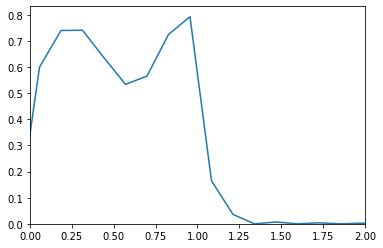

In [20]:
# Limit Usage i.e Reprocal to the Credit score 
plt.xlim(0,2)
sbn.kdeplot(Limit_Usage)

- Low Limit Usage represents the high credit score .
- high Limit Usage Represens the Low credit score .
- Here has a interesting thing there are the Customers whose has Limit Usage is greater than 1. that means Balance is greater than Credit Limits . They are in risk.

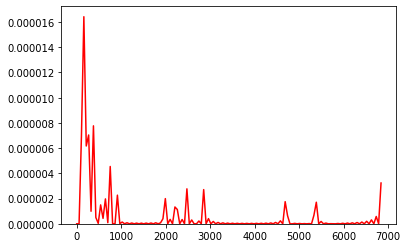

In [21]:
# Payments to Min payment Ratio 
sbn.kdeplot(Pay_min_pay,color="red")

- There are the Customers who makes high minimum payments than the actual payments .
- There are the Customers who have low minumum payments compared to Payments.

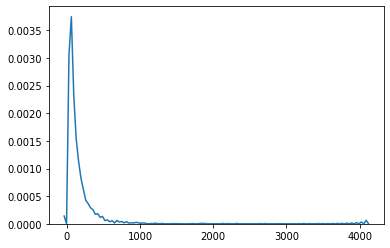

In [23]:
# Monthly Average Purchases 
sbn.kdeplot(monthly_avg_purchases)

- There are some Customers who has mothly low purchases
- There are only few Customers have high purchases

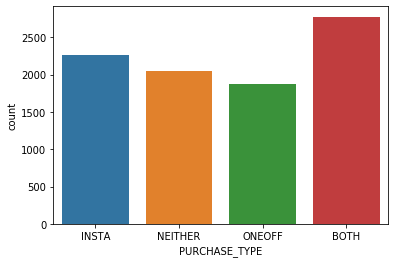

In [24]:
# Purchase Types 
# Number of Customers has
sbn.countplot(data.PURCHASE_TYPE)

- The Large Number of Customers who makes the Both Purchases. 
- Low customers are making the ONE-OFF Purchases.

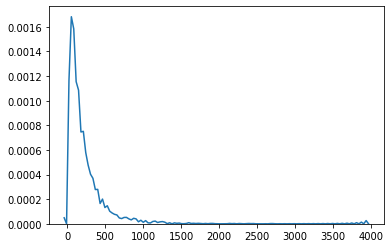

In [25]:
# Monthly Average Cash Advance
sbn.kdeplot(monthly_avg_cash_advance)

  - Monthly cash advances and Monthly Purchases are very similar by graph

***Analyzing Multivariate Variables***

Text(0, 0.5, 'Monthly average Purchases')

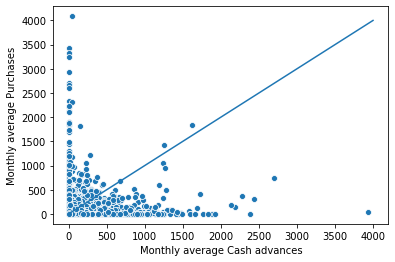

In [31]:
# Monthly cash Advance and Monthly Average Purchases
sbn.scatterplot(monthly_avg_cash_advance,monthly_avg_purchases)
plt.plot([0,4000],[0,4000])
plt.xlabel("Monthly average Cash advances")
plt.ylabel("Monthly average Purchases")

- There are large number of Customers are taking low cash advances and makiing high purchases

In [33]:
# analyzing with the pairplots
# Creating the Data Frame 
vis_data=pd.DataFrame()
vis_data["Monthly_average_Balance"]=data.BALANCE
vis_data["Montly_average_Purchase"]=monthly_avg_purchases
vis_data["Monthly_average_Cash_advance"]=monthly_avg_cash_advance
vis_data["Monthly_average_Payments"]=mont_avg_payments
vis_data["Limit_Usage"]=Limit_Usage
vis_data["payment_minipay"]=Pay_min_pay
vis_data["purchase_type"]=data.PURCHASE_TYPE

In [34]:
vis_data.head()

,Monthly_average_Balance,Montly_average_Purchase,Monthly_average_Cash_advance,Monthly_average_Payments,Limit_Usage,payment_minipay,purchase_type
0,40.900749,7.950000,0.000000,16.816840,0.040901,1.446508,INSTA
1,3202.467416,0.000000,536.912124,341.919383,0.457495,3.826241,NEITHER
2,2495.148862,64.430833,0.000000,51.838895,0.332687,0.991682,ONEOFF
3,1666.670542,124.916667,17.149001,0.000000,0.222223,0.000000,ONEOFF
4,817.714335,1.333333,0.000000,56.527897,0.681429,2.771075,ONEOFF


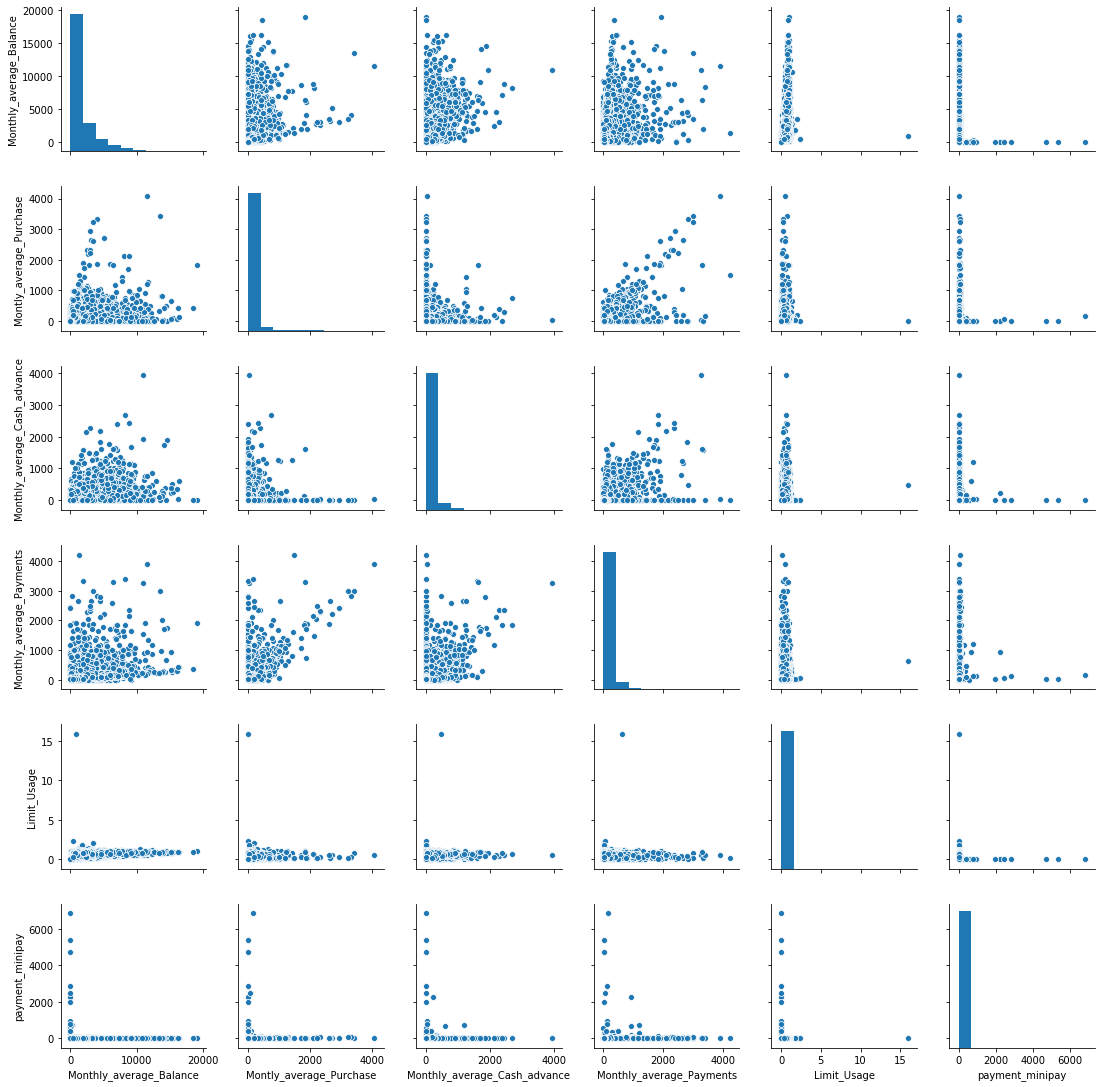

In [37]:
# Pair plot for the Data with all the derived new KPI's
sbn.pairplot(vis_data)

- Haing the high avererage balance have low payment to minpayment ratio.
- Increasing with the monthly average Purchase increaser the Monthlt payments also .i.e there is linear correration between the purchases and payments.
- There are some customers are whose payments are low even having the high Balance.
- There are few customers who have high Balance making high Purchases.
- Even though making low purchase but paying huge due.
- Low cash advances and making high Purchases

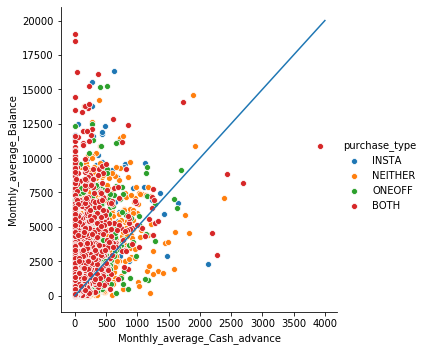

In [56]:
# payments 
sbn.FacetGrid(data=vis_data,hue="purchase_type",height=5).map(sbn.scatterplot,"Monthly_average_Cash_advance","Monthly_average_Balance").add_legend()
plt.plot([0,4000],[0,20000])

- The Customers who are making the Both Purchase are taking low cash Advances .
- Some of Custmers who are making the Neither of Any type of Purchase  were taking high cash advance.


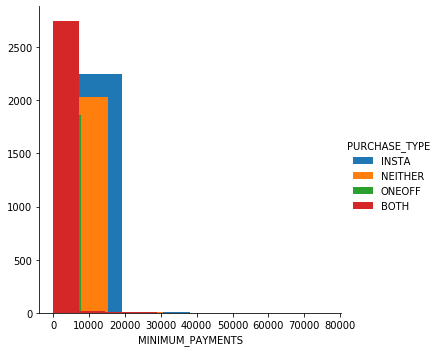

In [63]:
sbn.FacetGrid(data=data,hue="PURCHASE_TYPE",height=5).map(plt.hist,"MINIMUM_PAYMENTS",bins=4).add_legend()


- The Customers who are making the Both type of Purchases paying the Minimum payments are low
- The Customers who are making the Installment Purchase type paying maximum minimum payments.

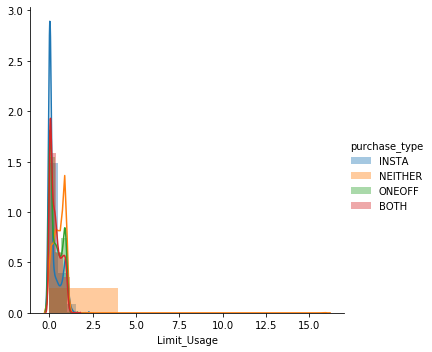

In [84]:
sbn.FacetGrid(data=vis_data,hue="purchase_type",height=5).map(sbn.distplot,"Limit_Usage",bins=4).add_legend()

- Most of the customers who are making the Installment Purchases are have the high Credit score.
- Also most of the Customers who are making the Both Purchase type are having the high credit score.
- The Customers who are making the Neither of Type having the low Credit score

### Preparing the Dataset for the Machine learning Model

In [113]:
# droping the Customer id column
clean_data=data.drop(columns="CUST_ID",axis=1)

In [114]:
# Creating the Dummy variables 
clean_data=pd.get_dummies(data=clean_data,columns=["PURCHASE_TYPE"])

In [115]:
# Adding the Derived KPI's to the Dataset
clean_data["Montly_avg_purchases"]=monthly_avg_purchases
clean_data["Monthly_avg_payments"]=mont_avg_payments
clean_data["Monthly_cash_advance"]=monthly_avg_cash_advance
clean_data["Limit_Usage"]=Limit_Usage
clean_data["pay_min_ratio"]=Pay_min_pay

In [116]:
# getting the information of the cleaned dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [117]:
# Standardizing or Normalization of data
sc=StandardScaler()
min_max=MinMaxScaler()

In [118]:
Norm_data=min_max.fit_transform(clean_data) # It always lies between the 0 and 1
stard_data=sc.fit_transform(clean_data) # It doesn't have any specific range --> and assuming the all features are follow the Normal distribution

In [134]:
# Converting the arrays to the Pandas dataFrame
Norm_data=pd.DataFrame(data=Norm_data,columns=clean_data.columns)
stard_data=pd.DataFrame(data=stard_data,columns=clean_data.columns)

## Building the Models 

#### Experiment :1  Building the model with the Normalized data (K-means Clustring)

In [121]:
# Now bilding the k-means Clustring model for the Normalized data 
# For Deciding the Number of CLusters we need by the Elbow method and Silhotte score .
elbow=[]
silhot=[]
num_cluster=range(2,20)
for i in num_cluster:
    model=KMeans(n_clusters=i)
    model.fit(Norm_data)
    elbow.append(model.inertia_)
    silhot.append(silhouette_score(Norm_data,model.labels_))

Text(0.5, 1.0, 'Elbow Methods  ')

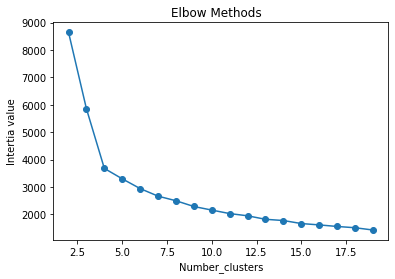

In [122]:
# PLotting the Elbow Methods 
plt.plot(num_cluster,elbow,marker="o")
plt.xlabel("Number_clusters")
plt.ylabel("Intertia value")
plt.title("Elbow Methods  ")

Text(0, 0.5, 'Silchot metric')

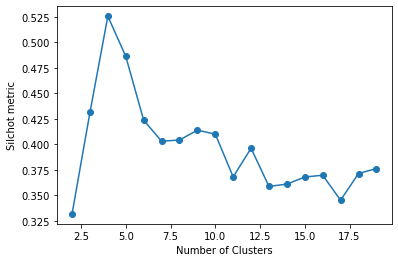

In [123]:
plt.plot(num_cluster,silhot,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silchot metric")

***By the Elbow Method and silhouette_score having the 4 clusters are very suitable.***

#### Experimnet:2 Building the Model with the Standaradized data (k-means Clustring )

In [124]:
# Now bilding the k-means Clustring model for the standardized data 
# For Deciding the Number of CLusters we need by the Elbow method and Silhotte score .
elbow=[]
silhot=[]
num_cluster=range(2,20)
for i in num_cluster:
    model=KMeans(n_clusters=i)
    model.fit(stard_data)
    elbow.append(model.inertia_)
    silhot.append(silhouette_score(stard_data,model.labels_))

Text(0.5, 1.0, 'Elbow Methods  ')

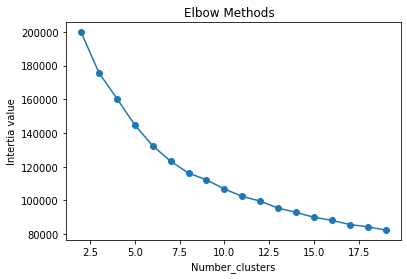

In [125]:
# PLotting the Elbow Methods 
plt.plot(num_cluster,elbow,marker="o")
plt.xlabel("Number_clusters")
plt.ylabel("Intertia value")
plt.title("Elbow Methods  ")

Text(0, 0.5, 'Silchot metric')

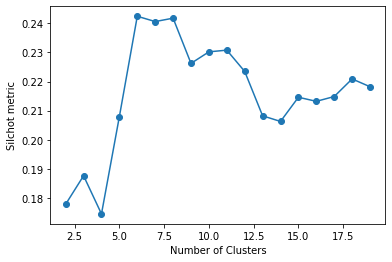

In [126]:
plt.plot(num_cluster,silhot,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silchot metric")

***By the Standardized data we got the 6 clusters and That too it has low silhouette_score compared to the score which we got for the normalized data***

In [127]:
# Checking for the Correlation
clean_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,PURCHASE_TYPE_BOTH,PURCHASE_TYPE_INSTA,PURCHASE_TYPE_NEITHER,PURCHASE_TYPE_ONEOFF,Montly_avg_purchases,Monthly_avg_payments,Monthly_cash_advance,Limit_Usage,pay_min_ratio
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,0.072692,0.077758,-0.200831,0.152361,-0.031082,0.179711,0.319717,0.475431,0.503557,-0.039446
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,0.119776,0.193949,-0.134502,0.011738,-0.088938,0.131281,0.059540,0.086020,0.404661,-0.089272
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.086288,0.396686,-0.126853,-0.255291,-0.052136,0.995845,0.589434,-0.055473,-0.057409,0.016731
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.064150,0.317956,-0.207457,-0.194062,0.060271,0.913060,0.554591,-0.034545,-0.042212,0.010301
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.086143,0.353505,0.081506,-0.247149,-0.233936,0.677024,0.374717,-0.067782,-0.058264,0.020621
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,-0.068312,-0.068598,-0.154909,0.261753,-0.026587,-0.047502,0.464109,0.976364,0.215199,-0.003378
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.061506,0.515593,0.295918,-0.664037,-0.217147,0.395337,0.096462,-0.215786,-0.201782,0.011407
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.082466,0.525795,-0.394452,-0.368981,0.204113,0.499711,0.236766,-0.089034,-0.092007,-0.004550
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.073275,0.463390,0.430024,-0.498338,-0.471909,0.314136,0.077837,-0.179333,-0.161420,0.017921
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,-0.133372,-0.094894,-0.237116,0.373717,-0.024397,-0.116109,0.195322,0.628312,0.360131,-0.021863


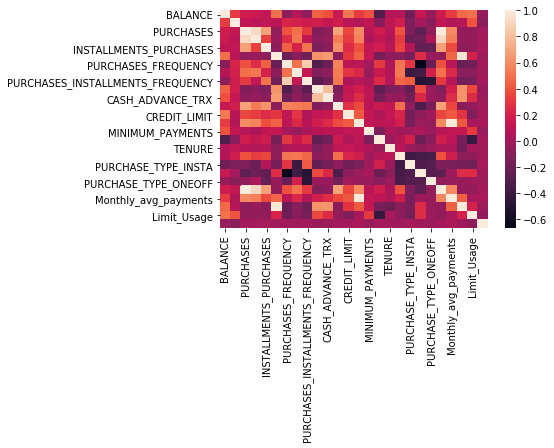

In [132]:
#Heatamp for the Correlation
sbn.heatmap(clean_data.corr())

- Here there was a high correaltion between the Purchases --> OneOFF purchases.
- Correlation between the Cash Advance --> cash Advance Frequency and Cash Advance Transcation.
- So there are some correlations are exit .we have to remove the highly correlated variabel. so that we can reduces the diminesion.

So with out deleting the varibale we need to preserve much informatin so here we use the PCA reduction Technique.

#### Experiment-3 : Reduce the Features and Build the model with reduced Data

In [135]:
# to decide how many features will store much information ---> we need to calcute the cummulative sum of vaience 
# That gives the how information information was preserved.
var_list=[]
feats=range(2,len(Norm_data.columns)+1)
for i in feats:
    pca=PCA(n_components=i)
    a=pca.fit_transform(Norm_data)
    var_list.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience_Ratio')

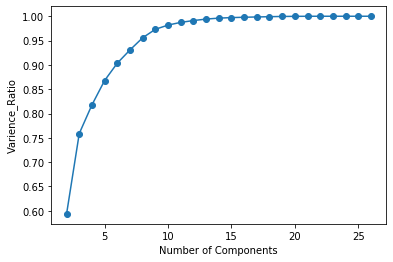

In [136]:
# plotting the varience ration and the Number of components 
plt.plot(feats,var_list,marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Varience_Ratio")

***So Using the 10 components we can preserve above 95% of information***

In [137]:
# so now we use the 10 principal components 
pca=PCA(n_components=10)
new_feat=pca.fit_transform(Norm_data)

In [138]:
# Now bilding the k-means Clustring model for the reduced dimensions 
# For Deciding the Number of CLusters we need by the Elbow method and Silhotte score .
elbow=[]
silhot=[]
num_cluster=range(2,20)
for i in num_cluster:
    model=KMeans(n_clusters=i)
    model.fit(new_feat)
    elbow.append(model.inertia_)
    silhot.append(silhouette_score(new_feat,model.labels_))

Text(0.5, 1.0, 'Elbow Methods  ')

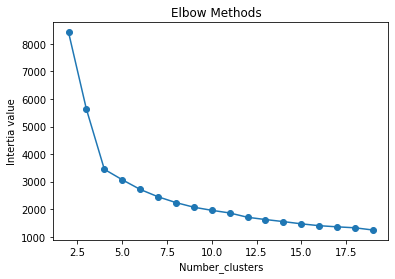

In [139]:
# PLotting the Elbow Methods 
plt.plot(num_cluster,elbow,marker="o")
plt.xlabel("Number_clusters")
plt.ylabel("Intertia value")
plt.title("Elbow Methods  ")

Text(0, 0.5, 'Silchot metric')

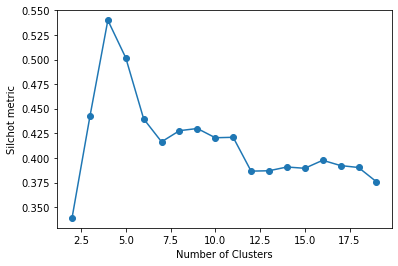

In [140]:
plt.plot(num_cluster,silhot,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silchot metric")

***Again We got a 4 cluster But this Time got more silchott score***

### By the above Experiments we Choose the 4 Cluster  Experiment 3

In [141]:
model_f1=KMeans(n_clusters=4)

In [142]:
model_f1.fit(new_feat)
labels_f1=model_f1.predict(new_feat)

In [144]:
# So now concatenating with the original data
clean_data["Clusters"]=labels_f1

In [146]:
# For Conclusion we Grouping the customers by their clusters. each feature having their mean values
Clustering_f1=clean_data.groupby("Clusters").apply(lambda x:x[clean_data.columns].mean())

In [147]:
Clustering_f1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASE_TYPE_BOTH,PURCHASE_TYPE_INSTA,PURCHASE_TYPE_NEITHER,PURCHASE_TYPE_ONEOFF,Montly_avg_purchases,Monthly_avg_payments,Monthly_cash_advance,Limit_Usage,pay_min_ratio,Clusters
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1805.968182,0.945825,2267.805807,1379.884427,888.049776,764.226676,0.799116,0.436502,0.639229,0.106810,...,1.0,0.0,0.0,0.0,192.685172,215.597760,67.821985,0.353548,7.236982,0.0
1,1438.761601,0.836331,786.759029,786.827679,0.000000,870.530348,0.321001,0.320779,0.000000,0.125657,...,0.0,0.0,0.0,1.0,69.688958,130.562469,78.995966,0.381074,5.571082,1.0
2,2147.759969,0.882385,0.000000,0.000000,0.000000,1988.467370,0.000163,0.000000,0.000163,0.272694,...,0.0,0.0,1.0,0.0,0.000000,145.161644,182.858169,0.573771,10.087451,2.0
3,845.278262,0.822451,536.904217,0.000000,537.878469,419.959034,0.694690,0.000000,0.658478,0.053507,...,0.0,1.0,0.0,0.0,46.974347,85.680087,38.398206,0.271678,13.259004,3.0


In [148]:
Clustering_f1=Clustering_f1.T

Text(0.5, 1.0, 'Cluster 3')

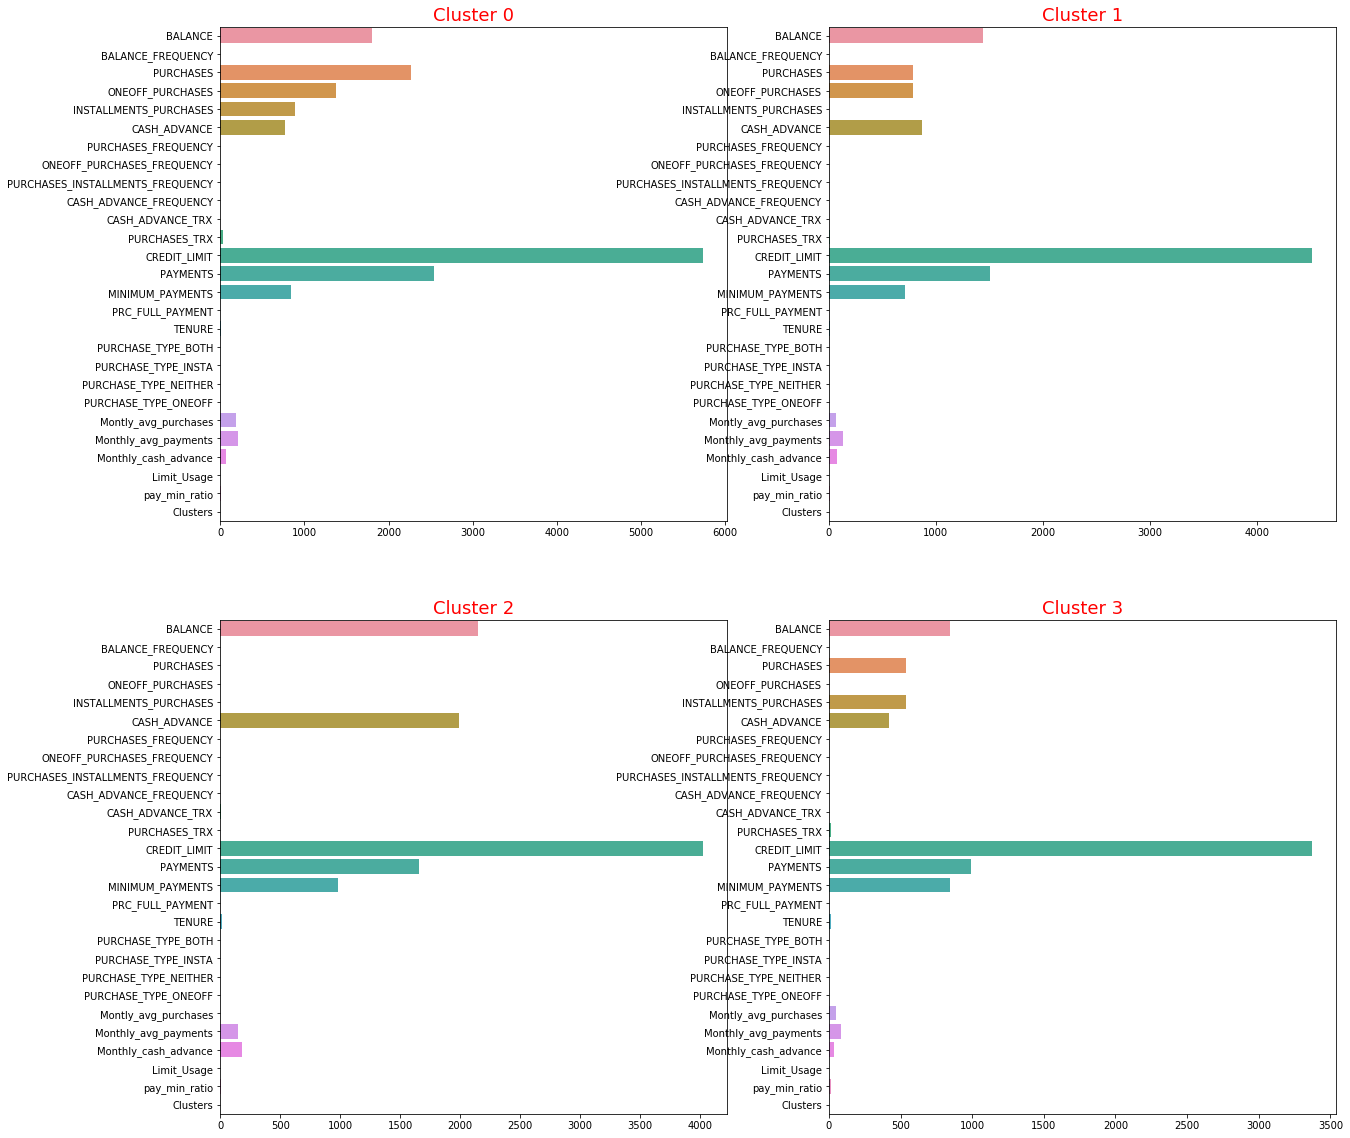

In [149]:
# Plotting the all features with the various clustring 
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
k=Clustering_f1[0]
plt.title("Cluster 0",size=15)
sbn.barplot(y=k.index,x=k.values,ax=ax[0,0])
ax[0,0].set_title("Cluster 0",size=18,color="red")
k=Clustering_f1[1]

sbn.barplot(y=k.index,x=k.values,ax=ax[0,1])
ax[0,1].set_title("Cluster 1",size=18,color="red")

k=Clustering_f1[2]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,0])
ax[1,0].set_title("Cluster 2",size=18,color="red")

k=Clustering_f1[3]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,1])
ax[1,1].set_title("Cluster 3",size=18,color="red")


In [151]:
Clustering_f1=Clustering_f1.T

In [159]:
selected_columns=["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","pay_min_ratio","Montly_avg_purchases","Monthly_cash_advance","Monthly_avg_payments","Limit_Usage","MINIMUM_PAYMENTS"]

In [160]:
len(selected_columns)

8

Text(0.5, 1.0, 'Minimum payments')

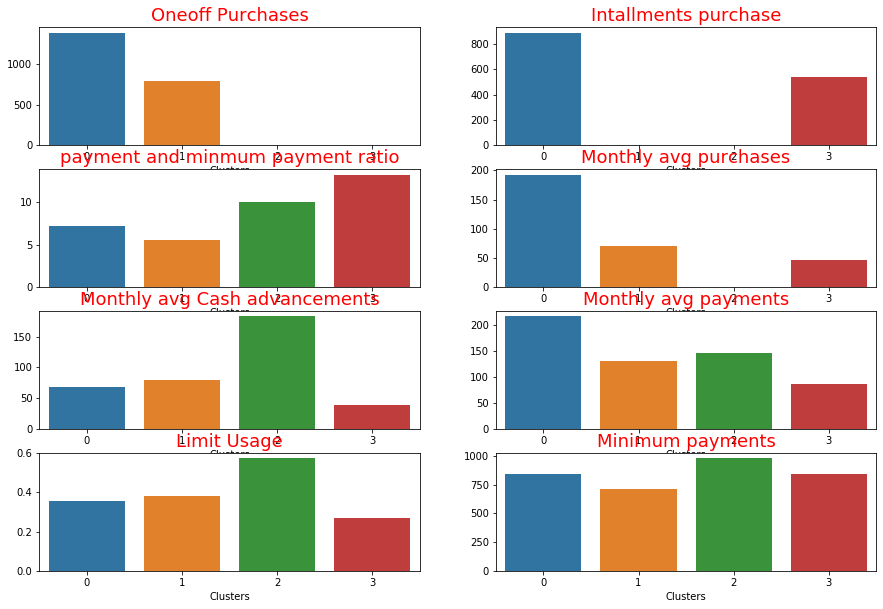

In [167]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(15,10))
k=Clustering_f1[selected_columns[0]]
sbn.barplot(x=k.index,y=k.values,ax=ax[0,0])
ax[0,0].set_title("Oneoff Purchases",size=18,color="red")

k=Clustering_f1[selected_columns[1]]
sbn.barplot(x=k.index,y=k.values,ax=ax[0,1])
ax[0,1].set_title("Intallments purchase",size=18,color="red")

k=Clustering_f1[selected_columns[2]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,0])
ax[1,0].set_title("payment and minmum payment ratio",size=18,color="red")

k=Clustering_f1[selected_columns[3]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,1])
ax[1,1].set_title("Monthly avg purchases",size=18,color="red")

k=Clustering_f1[selected_columns[4]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,0])
ax[2,0].set_title("Monthly avg Cash advancements",size=18,color="red")

k=Clustering_f1[selected_columns[5]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,1])
ax[2,1].set_title("Monthly avg payments",size=18,color="red")

k=Clustering_f1[selected_columns[6]]
sbn.barplot(x=k.index,y=k.values,ax=ax[3,0])
ax[3,0].set_title("Limit Usage",size=18,color="red")

k=Clustering_f1[selected_columns[7]]
sbn.barplot(x=k.index,y=k.values,ax=ax[3,1])
ax[3,1].set_title("Minimum payments",size=18,color="red")


In [173]:
print("The Percentage of Customers fromt the Overall Customers :")
print("---------------------------------------------------------")
clean_data.Clusters.value_counts()*100/len(clean_data)

The Percentage of Customers fromt the Overall Customers :
---------------------------------------------------------


0    30.994413
3    25.251397
2    22.815642
1    20.938547
Name: Clusters, dtype: float64

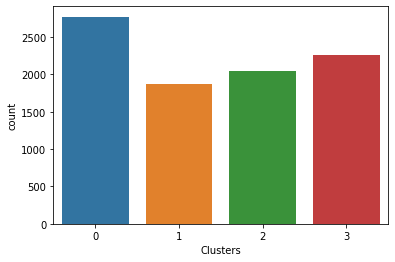

In [168]:
# The NUmber of Customers for Each Cluster
sbn.countplot(clean_data.Clusters)

### Conclusions :


       Cluster 0 : In this Group Both ONEOFF and Installment Purchases are high compared to all other goups
                   and also paying maximum monthly average payments and also have good Credit score.
               
       Cluster 1 : The Customers in this Group making only ONEOFF purchase and that was also low . They have 
                   low payment to minimu payment ratio . They are paying the low Minimum payments. 
                   Maintaining good Credit score.
                   
       Cluster 2 : The averaga Purchase are very Low .Taking the Maximum cash advances. They have maximum 
                   Minumum payments.They have poor Credit Score . So they are consider as the Most risk 
                   customers.
                   
       Cluster 3 : These Customers making only Installment Purchases. They have high payment and Minumum 
                   payment ratio.Taking Low cash Advances. They have Good credit score .Compare to all 
                   groups have low Limit Usage.
       

***There are 22% of Customers who are in Risk. i.e They Belongs to the Cluster 2***